In [74]:
import pandas as pd
import os

In [75]:
def parseErrFile(path):
    sim_names = []
    sim_errors = []
    with open(path, "r") as f:
        for line in f:
            aux = line.split()
            if len(aux)>=7:
                if "_" in aux[0]:
                    if aux[-1]!='nan':
                        sim_names.append(aux[0])
                        sim_errors.append(aux[-1])
    return sim_names, sim_errors

def makedf(sim_names, sim_errors):
    d = {"file_name": sim_names, "error": pd.to_numeric(sim_errors)}
    return pd.DataFrame(data=d)

def parseAllSpecies(path):
    debug_folder = path+'/debug/*.csv'
    return debug_folder


In [76]:
dir_path = '/home/nvme/Opt/outputs/atp_test2.opp'
dirs = os.listdir(dir_path)

#Ez a driveról letöltötthöz jó
#for d in dirs:
#    if ".opp" in d:
#       sim_names, sim_errors = parseErrFile(dir_path+'/'+d+'/errfValues')
#       df = makedf(sim_names, sim_errors)
#
#       minErr = df.iloc[df['error'].idxmin()].to_frame().T
#       minErr.to_csv("testing.csv", mode='a', index=False, header=False)
#
#       print(df.iloc[df['error'].idxmin()])
for d in dirs:
    if d=='errfValues':
       sim_names, sim_errors = parseErrFile(dir_path+'/'+d)
       df = makedf(sim_names, sim_errors)

       minErr = df.iloc[df['error'].idxmin()].to_frame().T
       minErr.to_csv("./glucose.csv", mode='a', index=False, header=False)

       print(df.iloc[df['error'].idxmin()])



file_name    atp_test_0001
error             0.184964
Name: 0, dtype: object


In [77]:
plot_dir=dir_path+'/plots/plotData.txt'
df_list = list()
# holczer20019 mindegyik best fit 10000 sampleből, külön-külön
# ulk=4153, mtor=6235, ampk=8795 ----> ez big rip, aut=5011 -----> big rip
# zeng ugyan ugy mint holczer
# casp=6366 aut=9572 bax=5951 bec1=3893
with open(plot_dir, 'r') as f:
    lines = f.readlines()
    cols = ["XML", "species", "point", "t / s", "exp.val.", "errorbar_low", "errorbar_high", "mech20240619"]
    l = 0
    while l in range(len(lines)):
        if '_0001_' in lines[l]:
            df = pd.DataFrame(columns=cols)
            for i in range(2,8):
                data = lines[l+i].split()
                df.loc[len(df)] = data
            df_list.append(df)
        l+=10
            

In [78]:
df_list

[             XML species point        t / s     exp.val. errorbar_low  \
 0  atp_test_0001     ATP     1  0.00000E+00  5.53510E-13  6.99082E-13   
 1  atp_test_0001     ATP     2  2.59200E+06  4.22770E-13  6.51150E-13   
 2  atp_test_0001     ATP     3  5.18400E+06  1.51380E-13  2.96952E-13   
 3  atp_test_0001     ATP     4  7.77600E+06  9.76380E-14  1.83652E-13   
 4  atp_test_0001     ATP     5  1.03680E+07  4.96490E-14  1.58911E-13   
 5  atp_test_0001     ATP     6  1.29600E+07  4.13470E-14  1.27361E-13   
 
   errorbar_high mech20240619  
 0   4.07938E-13  5.53505E-13  
 1   1.94390E-13  3.15798E-13  
 2   5.80800E-15  1.80209E-13  
 3   1.16240E-14  1.02849E-13  
 4  -5.96130E-14  5.87031E-14  
 5  -4.46670E-14  3.35115E-14  ]

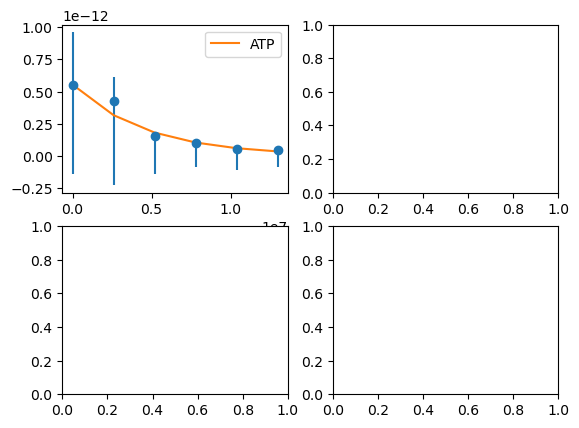

In [79]:
import matplotlib.pyplot as plt
import numpy as np

n_rows = 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols)
for i, df in enumerate(df_list):
    ax = axes[i // n_cols, i % n_cols]

    test = df 
    fig_name = test.species[0]

    data_points = test['exp.val.'].astype(float)
    errorbar_high = test['errorbar_high'].astype(float)
    errorbar_low = test['errorbar_low'].astype(float)
    t = test['t / s'].astype(float)
    sim = test['mech20240619'].astype(float)
    errorbar_high[errorbar_high < 0] = 0
    errorbar_low[errorbar_low < 0] = 0
    ax.errorbar(t, data_points, yerr=[errorbar_low,errorbar_high], fmt='o')
    ax.plot(t,sim, label = fig_name)
    ax.legend()

ez a jó glü fogyás
ATP=>REF	0.0000002195	0	0